In [10]:
import base64
import numpy as np
import re,cv2

In [6]:
np.__version__

'1.17.4'

In [9]:
re.__version__

'2.2.1'

In [11]:
cv2.__version__

'4.1.2'

In [12]:
from flask import Flask

In [17]:
import numpy as np

In [18]:
def borders(here_img, thresh):
    size = here_img.shape
    check = int(115 * size[0] / 600)
    image = here_img[:]
    top, bottom = 0, size[0] - 1
    #plt.imshow(image)
    #plt.show()
    shape = size

    #find the background color for empty column
    bg = np.repeat(thresh, shape[1])
    count = 0
    for row in range(1, shape[0]):
        if  (np.equal(bg, image[row]).any()) == True:
            #print(count)
            count += 1
        else:
            count = 0
        if count >= check:
            top = row - check
            break
    
    
    shape = image.shape
    bg = np.repeat(thresh, shape[1])
    count = 0
    rows = np.arange(1, shape[0])
    #print(rows)
    for row in rows[::-1]:
        if  (np.equal(bg, image[row]).any()) == True:
            count += 1
        else:
            count = 0
        if count >= check:
            bottom = row + count
            break
    #print(count)
    
    
    #plt.imshow(here_img[top:bottom, :])
    #plt.imshow(here_img[top:bottom, :])
    #plt.show()
    
    d1 = (top - 2) >= 0 
    d2 = (bottom + 2) < size[0]
    d = d1 and d2
    if(d):
        b = 2
    else:
        b = 0
    
    return (top, bottom, b)


In [21]:
image=cv2.imread('output.png',0)

In [31]:
top,bottom,b=borders(image,0)

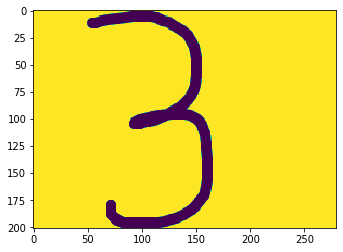

In [32]:
plt.imshow(image[top:bottom])